In [2]:
import datetime
# import folium
import importlib
import pandas as pd
import statistics

import SaveEcoBotFinder
import IdMatcher
import CamsWrapper

importlib.reload(SaveEcoBotFinder)
importlib.reload(IdMatcher)
importlib.reload(CamsWrapper)

from SaveEcoBotFinder import SaveEcoBotFinder
from IdMatcher import IdMatcher
from CamsWrapper import CamsWrapper

MATCHER = IdMatcher("../співставлення ID постів з ID Cams.csv")
FINDER = SaveEcoBotFinder("/media/data/osamoile/Ecobot_16_11_2020")
CAMS = CamsWrapper("../Cams_2019_2020_pm2.5_Kyiv.csv")

In [ ]:
# fullDf = pd.read_csv("/media/data/osamoile/SRI/all_posts_date.csv")
# fullDf.sort_values(by=["device_id", "date", "hour", "minute", "second"], inplace=True)
# fullDf

In [ ]:
# # data values higher than 1000 were excluded
# fullDf = fullDf[fullDf.value < 1000]
# df_hourly = fullDf.groupby([fullDf.device_id, fullDf.date, fullDf.hour]).value.agg(['median', 'count', 'std'])
# df_hourly.reset_index(inplace=True)
# df_hourly

In [ ]:
# cams_id = []
# for i in df_hourly.device_id:
#     cams_id.append(MATCHER.getCamsIdByPostId(i))
# df_hourly['cams_id'] = cams_id
# df_hourly.cams_id = df_hourly.cams_id.astype('int16')
# df_hourly

In [ ]:
# df_hourly.groupby([df_hourly.cams_id, df_hourly.date, df_hourly.hour])['median'].agg(['median', 'count', 'std'])

In [3]:
# CAMS_VALUE = []

# for i, row in df_hourly.iterrows():
#     CAMS_VALUE.append(CAMS.filter(row['date'], row['cams_id'], row['hour']))
# df_hourly['cams_value'] = CAMS_VALUE
# df_hourly.to_csv("/media/data/osamoile/SRI/all_posts_hourly_cams.csv", index=False)

df = pd.read_csv("/media/data/osamoile/SRI/all_posts_hourly_cams.csv")
# df[(df.cams_id == 6563) & (df.date == '2020-03-10') & (df.hour == 5)]
df

,device_id,date,hour,median,count,std,cams_id,cams_value
0,28,2019-03-10,0,14.475,22,0.940723,6563,11.244937
1,28,2019-03-10,1,11.470,25,0.827006,6563,11.169684
2,28,2019-03-10,2,8.135,20,0.520646,6563,11.129512
3,28,2019-03-10,3,8.290,24,0.522879,6563,11.039108
4,28,2019-03-10,4,6.585,24,0.327640,6563,11.489038
...,...,...,...,...,...,...,...,...
601266,13853,2020-11-16,18,16.480,23,1.699593,6563,15.778329
601267,13853,2020-11-16,19,16.350,23,1.282493,6563,16.301861
601268,13853,2020-11-16,20,15.570,22,1.246007,6563,15.663918
601269,13853,2020-11-16,21,11.445,24,1.585128,6563,13.249365


In [4]:
len(df.device_id.unique())

151

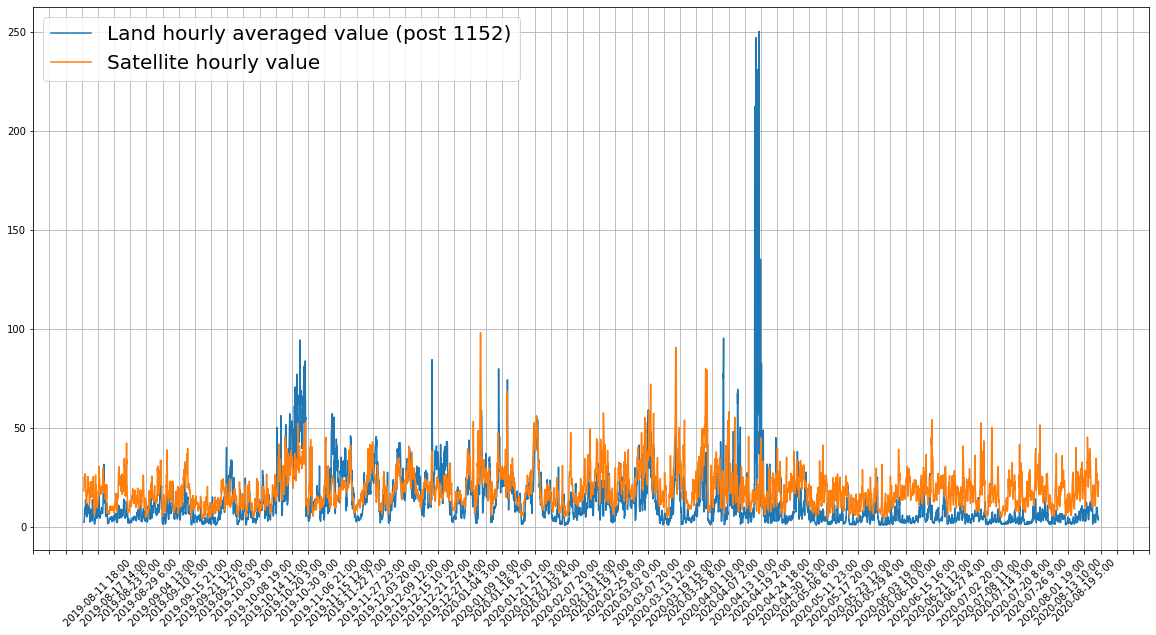

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot(df: pd.DataFrame, device_id: int):
    df = df[df.device_id == device_id]
    fig, ax = plt.subplots(figsize=(20, 10))
    label = [row['date'] + " " + str(row['hour']) + ":00" for i, row in df.iterrows()]
    ax.plot(label, df['median'], label='Land hourly averaged value (post %d)' % device_id)
    ax.plot(label, df.cams_value, label='Satellite hourly value')
    ax.legend(loc='upper left', prop={'size': 20})
    ax.grid()
    xmin, xmax = ax.get_xlim()
    custom_ticks = np.linspace(xmin, xmax, 70, dtype=int)
    ax.set_xticks(custom_ticks)
    plt.xticks(rotation=45)
    # ax.set_xticks(np.arange(0, len(label)+1, 1000))
    # plt.locator_params(axis='x', nticks=10)

    plt.show()

plot(df, 1152)

In [70]:
# mean_oct = statistics.mean(df[(df.device_id == 1152) & (df.date > '2019-10-16') & (df.date < '2019-10-24')]['median'])
# print(mean_oct)
# print(15 / mean_oct)

42.20657738095238
0.3553948443772516


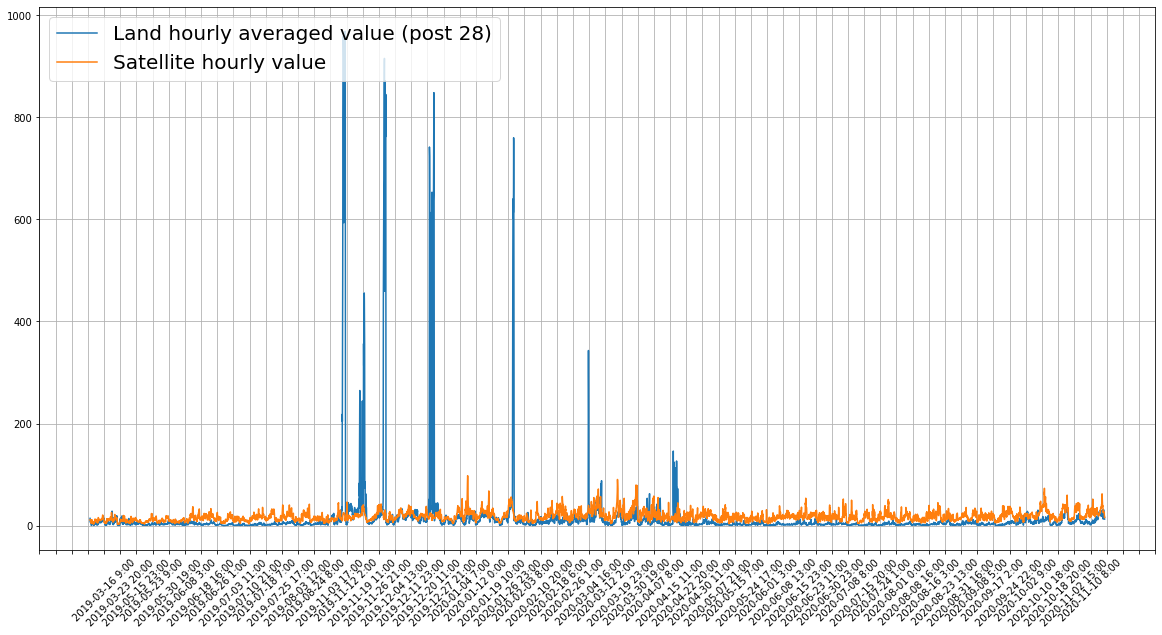

In [18]:
plot(df, 28)

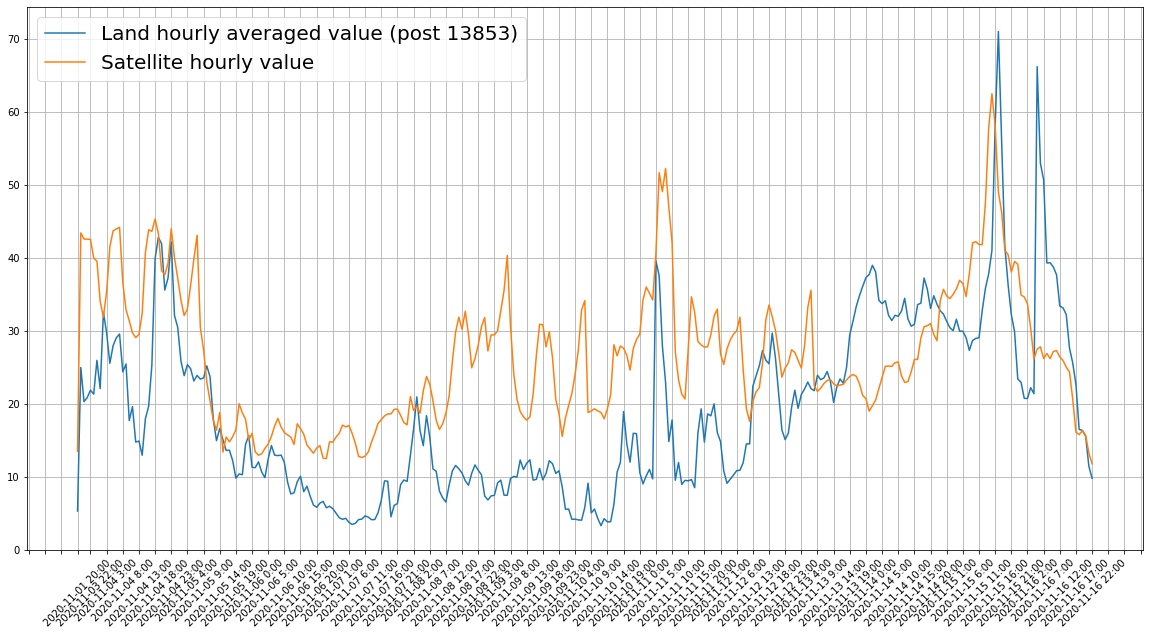

In [5]:
plot(df, 13853)

In [17]:
from sklearn.metrics import mean_squared_error

def df_stat(dff):
    device_id = []
    count = []
    r = []
    rmse = []
    nrmse = []

    for i in dff.device_id.unique():
        df_station = dff[dff.device_id == i]
        count_station = len(df_station)
        r_station = df_station['median'].corr(df_station['cams_value'], method='pearson')
        rmse_station = mean_squared_error(df_station['median'].tolist(), df_station['cams_value'].tolist(), squared=False)

        device_id.append(i)
        count.append(count_station)
        r.append(r_station)
        rmse.append(rmse_station)
        nrmse.append(rmse_station / statistics.mean(df_station['median'].tolist()))

    d = pd.DataFrame({'device_id': device_id, 'count': count, 'r': r, 'rmse': rmse, 'nrmse': nrmse})
    return d

df_stat(df)

/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,device_id,count,r,rmse,nrmse
0,28,11160,0.085685,72.144847,4.530914
1,30,14300,0.388428,13.918409,1.153939
2,43,14422,0.427329,14.262906,1.208143
3,47,6066,0.565872,11.960815,2.083310
4,108,4907,0.183538,11.210685,2.583441
...,...,...,...,...,...
146,13802,433,0.539546,15.169494,0.472869
147,13803,418,0.571417,15.947174,0.507978
148,13811,374,0.556589,16.375782,0.500013
149,13820,366,0.508817,13.815888,0.656580


In [60]:
outliers_kmeans = [1041,13208,13703,13853,1415,2867,3514,3688,2792,13759,3603,1072,1330,1208,2878]
res = df_stat(df[(~df.date.str.startswith('2020-04')) & (~df.device_id.isin(outliers_kmeans))])
print(len(res[res.r >= 0.5]))
print(len(res[res.rmse < 15]))
print(len(res))
print(len(res[res.r >= 0.5]) / len(res))


82
87
135
0.6074074074074074


/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/osamoilenko/.local/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
# from sklearn.metrics import r2_score

# # R^2
# r2_score(LAND["value"].tolist(), LAND["cams"].tolist())